In [1]:
import pandas as pd

combat = pd.read_csv("/content/combats.csv")
pokemon = pd.read_csv("/content/pokemon.csv")


In [2]:
combat.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [3]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
combat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  int64
 2   Winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


In [5]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


# Now, Let's clean! 

In [6]:
print(pokemon.duplicated().sum())
print(combat.duplicated().sum())

0
1952


We have 1952 dublicated values in combat data, we need to get rid of them. 

In [7]:
combat.drop_duplicates(keep=False, inplace=True)

In [8]:
combat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46142 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   46142 non-null  int64
 1   Second_pokemon  46142 non-null  int64
 2   Winner          46142 non-null  int64
dtypes: int64(3)
memory usage: 1.4 MB


In [9]:
combat.isnull().sum()

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

In [10]:
pokemon.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

We have 1 missing pokemon name and 386 missing type 2 names. We need to find that missing name and fill it up, but nearly the half of the type 2 infortmation is missing, therefore we can drop this feature. 

In [11]:
pokemon.drop('Type 2', axis=1, inplace=True)

In [12]:
pokemon['Name'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
795    False
796    False
797    False
798    False
799    False
Name: Name, Length: 800, dtype: bool

In [13]:
pokemon.drop_duplicates()

,#,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,80,160,60,170,130,80,6,True


In [14]:
pokemon.dropna()

,#,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,80,160,60,170,130,80,6,True


#Exploratory Data Analysis (EDA)

Let's check out top 10 Pokemon that has highest attack score

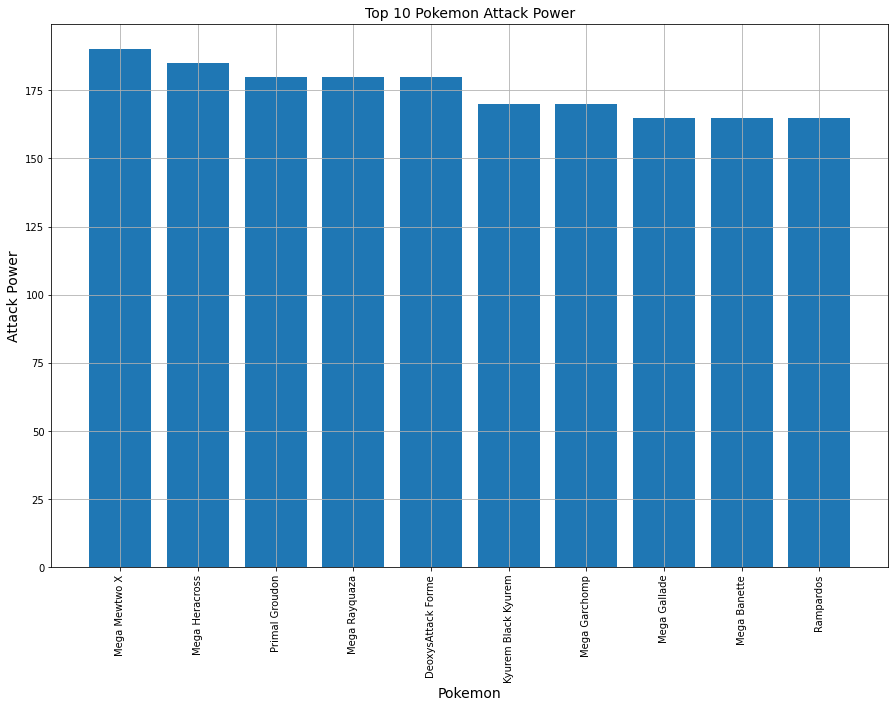

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

attack = pokemon[['Name','Attack']]
attack_bar = attack.sort_values('Attack',ascending=False).head(10)
plt.figure(figsize=(15,10))
plt.bar(attack_bar['Name'],attack_bar['Attack'])
plt.xticks(attack_bar['Name'], rotation = 'vertical',size= 10)
plt.title('Top 10 Pokemon Attack Power', fontsize=14)
plt.xlabel('Pokemon', fontsize=14)
plt.ylabel('Attack Power', fontsize=14)
plt.grid(True)
plt.show()

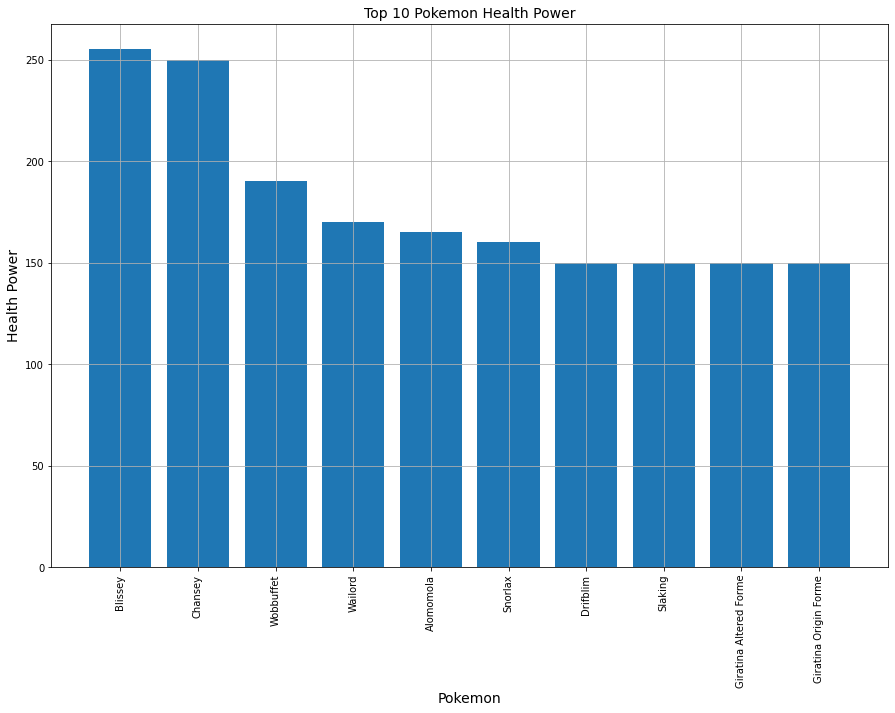

In [16]:
health = pokemon[['Name','HP']]
health_bar = health.sort_values('HP',ascending=False).head(10)
plt.figure(figsize=(15,10))
plt.bar(health_bar['Name'],health_bar['HP'])
plt.xticks(health_bar['Name'], rotation = 'vertical',size= 10)
plt.title('Top 10 Pokemon Health Power', fontsize=14)
plt.xlabel('Pokemon', fontsize=14)
plt.ylabel('Health Power', fontsize=14)
plt.grid(True)
plt.show()

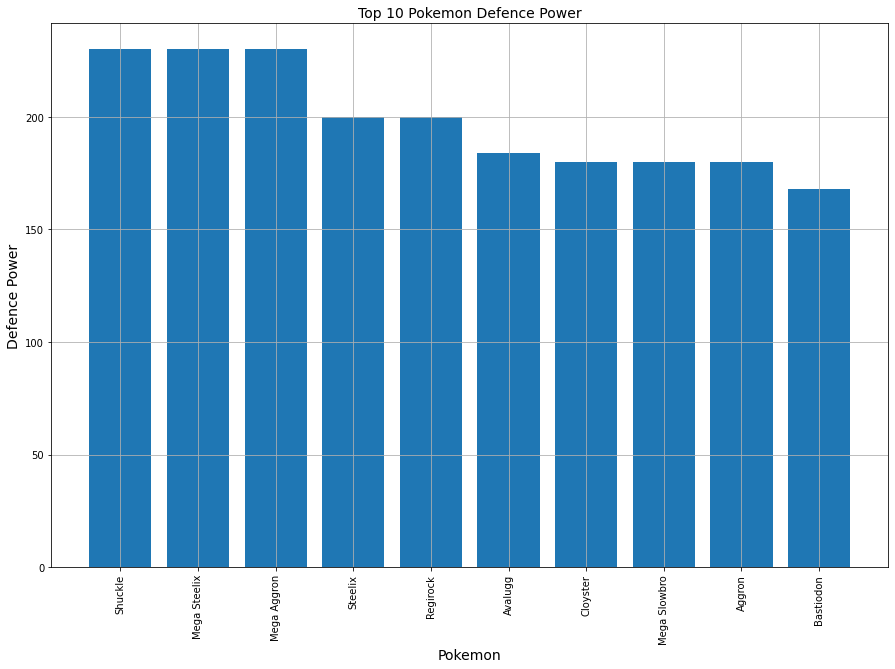

In [17]:
defence = pokemon[['Name','Defense']]
defence_bar = defence.sort_values('Defense',ascending=False).head(10)
plt.figure(figsize=(15,10))
plt.bar(defence_bar['Name'],defence_bar['Defense'])
plt.xticks(defence_bar['Name'], rotation = 'vertical',size= 10)
plt.title('Top 10 Pokemon Defence Power', fontsize=14)
plt.xlabel('Pokemon', fontsize=14)
plt.ylabel('Defence Power', fontsize=14)
plt.grid(True)
plt.show()

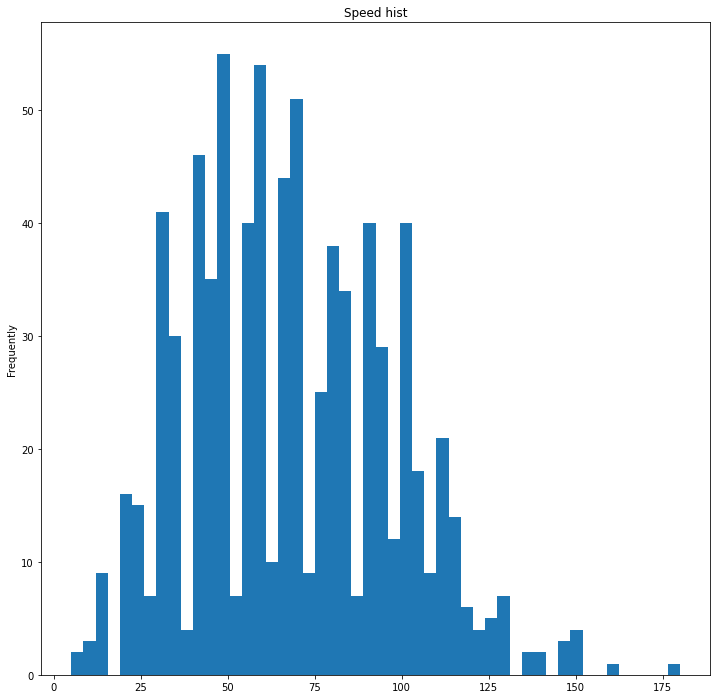

In [18]:
pokemon.Speed.plot(kind="hist",bins=50,figsize=(12,12))
plt.title("Speed hist")
plt.ylabel("Frequently")
plt.show()

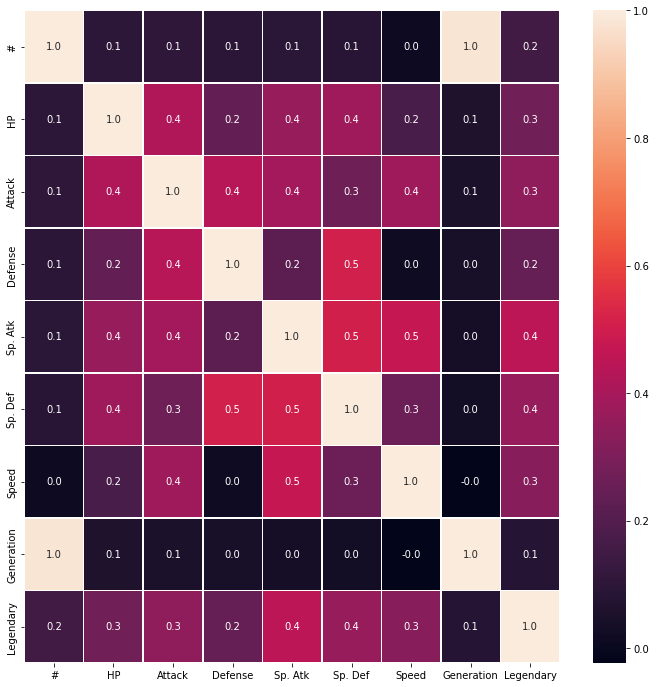

In [19]:
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(pokemon.corr(),annot=True,fmt=".1f",linewidths=.5,ax = ax) # we can also use seaborn to visualize the data.
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


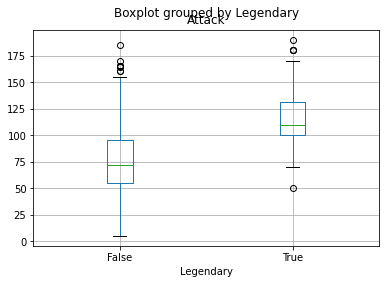

In [20]:
pokemon.boxplot(column ='Attack',by='Legendary') 
plt.show()

##Finding the Win percentages of Pokemons

In [21]:
combat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46142 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   46142 non-null  int64
 1   Second_pokemon  46142 non-null  int64
 2   Winner          46142 non-null  int64
dtypes: int64(3)
memory usage: 1.4 MB


In [22]:
total_Wins = combat.Winner.value_counts()
numberOfWins = combat.groupby('Winner').count()
countByFirst = combat.groupby('Second_pokemon').count()
countBySecond = combat.groupby('First_pokemon').count()

print("First winner: " + str(countByFirst.shape))
print("Second winner: " + str(countBySecond.shape))
print("Total Wins: " + str(total_Wins.shape))

First winner: (784, 2)
Second winner: (784, 2)
Total Wins: (783,)


In [23]:
numberOfWins = numberOfWins.sort_index()
numberOfWins['total_battles'] = countByFirst.Winner + countBySecond.Winner
numberOfWins['win_percentage']= numberOfWins.First_pokemon/numberOfWins['total_battles']

In [24]:
results2 = pd.merge(pokemon, numberOfWins, right_index = True, left_on='#')
results3 = pd.merge(pokemon, numberOfWins, left_on='#', right_index = True, how='left')

In [25]:
import numpy as np
results3[np.isfinite(results3['win_percentage'])].sort_values(by = ['win_percentage'])

,#,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,total_battles,win_percentage
289,290,Silcoon,Bug,50,35,55,25,25,15,3,False,3.0,3.0,116.0,0.025862
189,190,Togepi,Fairy,35,20,65,40,65,20,2,False,3.0,3.0,108.0,0.027778
638,639,Solosis,Psychic,45,30,40,105,50,20,5,False,4.0,4.0,119.0,0.033613
236,237,Slugma,Fire,40,40,40,70,40,20,2,False,4.0,4.0,113.0,0.035398
209,210,Wooper,Water,55,45,45,25,25,15,2,False,4.0,4.0,111.0,0.036036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,154,Aerodactyl,Rock,80,105,65,60,75,130,1,False,126.0,126.0,131.0,0.961832
703,704,Tornadus Therian Forme,Flying,79,100,80,110,90,121,5,True,108.0,108.0,112.0,0.964286
19,20,Mega Beedrill,Bug,65,150,40,15,80,145,1,False,111.0,111.0,115.0,0.965217
512,513,Weavile,Dark,70,120,65,45,85,125,4,False,110.0,110.0,113.0,0.973451


##Getting Ready for training 

Silcoon has the least win percentage and Mega Aerodactyl has the most win percentage.

In [26]:
df = results2
df.dropna(axis=0, how='any')
x = df.iloc[:, 4:10].values
y = df.iloc[:, 14].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

##Linear Regression Model

In [27]:
def Linear(x_train, x_test, y_train, y_test):
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(x_train, y_train)
    print(regressor.score(x_train, y_train))
    y_pred = regressor.predict(x_test)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    return mae
Linear(x_train, x_test, y_train, y_test)

0.9078648569491793


0.06096828327307669

##Random Forest Model

In [37]:
def RandomForest(x_train, x_test, y_train, y_test):
    from sklearn.ensemble import RandomForestRegressor
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(x_train, y_train)
    print(regressor.score(x_train, y_train))
    y_pred = regressor.predict(x_test)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    return mae
RandomForest(x_train, x_test, y_train, y_test)

0.9893724987736391


0.04949391981620531

##Keras Regression Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# having 18 neuron is based on the number of available features
model = Sequential()
model.add(Dense(7,activation = 'relu'))
model.add(Dense(7,activation = 'relu'))
model.add(Dense(7,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mean_squared_error')

In [34]:
model.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),
          batch_size=128,epochs=400)
model.summary()

Epoch 1/400
5/5 [==============================] - 1s 45ms/step - loss: 69.6744 - val_loss: 55.2508
Epoch 2/400
5/5 [==============================] - 0s 7ms/step - loss: 45.4290 - val_loss: 35.5595
Epoch 3/400
5/5 [==============================] - 0s 9ms/step - loss: 29.3643 - val_loss: 23.0413
Epoch 4/400
5/5 [==============================] - 0s 7ms/step - loss: 18.8482 - val_loss: 15.9724
Epoch 5/400
5/5 [==============================] - 0s 7ms/step - loss: 12.9939 - val_loss: 12.5288
Epoch 6/400
5/5 [==============================] - 0s 7ms/step - loss: 9.6015 - val_loss: 10.8210
Epoch 7/400
5/5 [==============================] - 0s 7ms/step - loss: 7.8870 - val_loss: 9.9300
Epoch 8/400
5/5 [==============================] - 0s 13ms/step - loss: 7.0375 - val_loss: 9.2006
Epoch 9/400
5/5 [==============================] - 0s 7ms/step - loss: 6.1749 - val_loss: 8.2515
Epoch 10/400
5/5 [==============================] - 0s 7ms/step - loss: 5.4263 - val_loss: 7.3400
Epoch 11/400
5/5

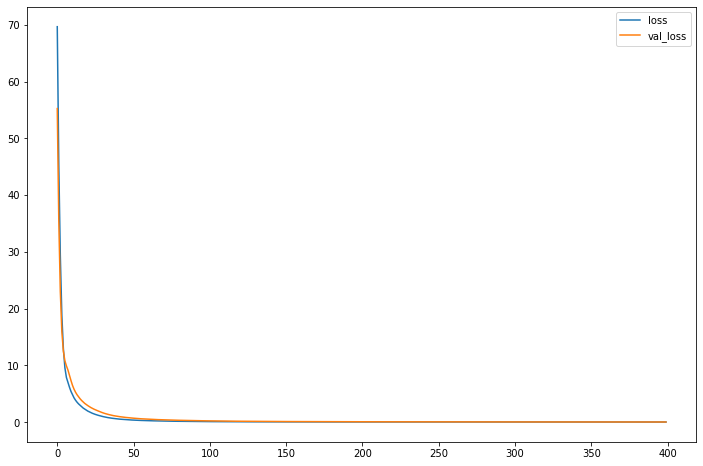

In [35]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

5/5 [==============================] - 0s 2ms/step
MAE: 0.16315507792200543
MSE: 0.045753905288819174
RMSE: 0.21390162525988243
VarScore: 0.3278732571595073


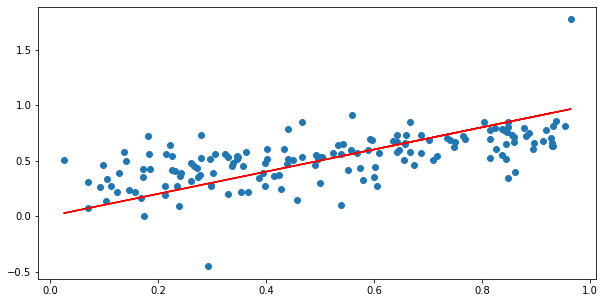

In [36]:
y_pred = model.predict(x_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

###We got ac accuracy of **32%** with keras regression model which was quite low. After that, we have tried linear regression and Random Forest models and we've received better results with **90%** and **98%** respectively. 